# Animal Detection Testing
Test if a pre-trained (on COCO) Faster RCNN network can be used off the shelf to detect animals in pictures.

In [31]:
import pandas as pd
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import models
from torch.utils.data import Dataset, DataLoader
from torchvision import utils
import torchvision.transforms as T
import time
from matplotlib.patches import Rectangle

In [32]:
root_dir = "/run/media/kevin/Volume/Neuseeland/Neuseeland_bilder/"
images = os.listdir(root_dir)


In [33]:
# Get Model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
  

# Test on Images

In [132]:
idx = 300
img_path = os.path.join(root_dir, images[idx])
img = Image.open(img_path)
im_size = np.array(img).shape

transform = T.Compose([T.Resize((224, 224)),T.ToTensor()])
img = transform(img)

# make predictions
pred = model([img])

# check if it detected anything
threshold = 0.9
pred_score = list(pred[0]['scores'].detach().numpy())
pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1]

# get them boxes
pred_boxes = [[i[0], i[1], i[2], i[3]] for i in list(pred[0]['boxes'].detach().numpy())]
pred_boxes = pred_boxes[:pred_t+1]


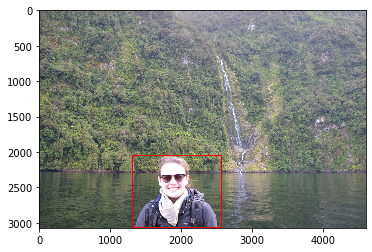

In [133]:

img = Image.open(img_path)
plt.imshow(img)


# Get the current reference
ax = plt.gca()


for box in pred_boxes:
    
    x_ = im_size[0] / 224
    y_ = im_size[1] / 224
    box[0] *= y_
    box[1] *= x_
    box[2] *= y_
    box[3] *= x_
    
    box_width = box[2] - box[0]
    box_height = box[3] - box[1]

    # Create a Rectangle patch
    rect = Rectangle((box[0],box[1]),box_width, box_height,linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

In [121]:
box

[1618.72412109375, 1524.1676199776784, 2722.2532784598216, 3643.790248325893]

In [134]:
pred

[{'boxes': tensor([[ 63.3322, 148.6621, 124.4019, 223.6312],
          [ 73.2198, 182.5107, 118.3421, 222.3153],
          [ 92.0634, 187.1767, 115.9084, 222.3658],
          [124.5739,  46.6855, 167.9301, 162.0392]], grad_fn=<StackBackward>),
  'labels': tensor([ 1, 27, 27, 16]),
  'scores': tensor([0.9957, 0.2456, 0.2034, 0.0621], grad_fn=<IndexBackward>)}]

### the actual box

In [118]:
box

[2431.546, 1519.5264, 2708.6367, 2426.884]

In [114]:
x_ = 224 / im_size[0]
y_ = 224 / im_size[1]
x_

0.07291666666666667

In [115]:
1 / x_

13.714285714285714